In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist


In [26]:
immunizations = pd.read_csv("Immunization.csv")
immunizations.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Percentage,Flag Codes,Flags
0,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2010,2010,91.6,NaN,NaN
1,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2011,2011,91.6,NaN,NaN
2,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2012,2012,91.8,NaN,NaN
3,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2013,2013,91.0,NaN,NaN
4,ACATHEPB,Immunisation: Hepatitis B,ENFANTTX,% of children immunised,AUS,Australia,2014,2014,91.2,NaN,NaN


In [27]:
importantData = immunizations[["Country", "Variable", "Year", "Percentage"]]
importantData.head()

,Country,Variable,Year,Percentage
0,Australia,Immunisation: Hepatitis B,2010,91.6
1,Australia,Immunisation: Hepatitis B,2011,91.6
2,Australia,Immunisation: Hepatitis B,2012,91.8
3,Australia,Immunisation: Hepatitis B,2013,91.0
4,Australia,Immunisation: Hepatitis B,2014,91.2


Percentage
Mean: 84.39279523293607
Std: 21.568353990572735



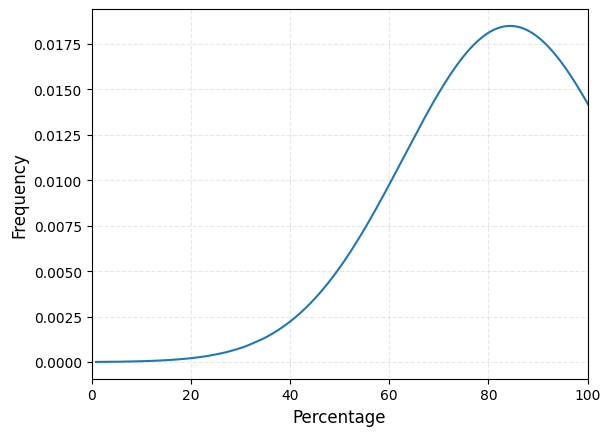

                           Country                                      Variable  Year  Percentage  Imm. Scaled
0                        Australia                     Immunisation: Hepatitis B  2010        91.6     0.892717
1                        Australia                     Immunisation: Hepatitis B  2011        91.6     0.892717
2                        Australia                     Immunisation: Hepatitis B  2012        91.8     0.894685
3                        Australia                     Immunisation: Hepatitis B  2013        91.0     0.886811
4                        Australia                     Immunisation: Hepatitis B  2014        91.2     0.888780
5                        Australia                     Immunisation: Hepatitis B  2015        92.8     0.904528
6                        Australia                     Immunisation: Hepatitis B  2016        94.2     0.918307
7                        Australia                     Immunisation: Hepatitis B  2017        94.7     0

/Users/maxko/Documents/A. GT/1. 2023 Spring/Hackathon/BeastCancerDS/distribution.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


In [28]:
xCol = "Percentage"
valueMean, valueStd = dist.dist_info(importantData, xCol)
dist.dist_plot(importantData, xCol, valueMean, valueStd, 0, 100)
importantData = dist.add_norm(importantData, xCol, "Imm. Scaled")
importantData.head()

print(importantData.to_string())

In [ ]:
def get_country_name(df, row):

    country = row["Country"]

    only_country_df = df[df["Country"] == country]

    num_rows = len(only_country_df.index)
    print("num_rows" + str(num_rows))
    
    avg = only_country_df["Imm. Scaled"].sum() / num_rows
    
    return avg

In [29]:
mini_important = importantData[importantData["Year"] == 2020]
mini_important = mini_important[["Country", "Variable", "Year", "Imm. Scaled"]]
mini_important = mini_important.reset_index()

mini_important.head()


mini_df_health['Country'] = mini_df_health.apply(get_country_name, axis=1)
    

print(mini_important.to_string())

     index                       Country                                      Variable  Year  Imm. Scaled
0       10                     Australia                     Immunisation: Hepatitis B  2020     0.929134
1       22                       Austria                     Immunisation: Hepatitis B  2020     0.827756
2       33                       Belgium                     Immunisation: Hepatitis B  2020     0.945866
3       44                        Canada                     Immunisation: Hepatitis B  2020     0.817913
4       55                Czech Republic                     Immunisation: Hepatitis B  2020     0.945866
5       77                       Germany                     Immunisation: Hepatitis B  2020     0.851378
6       88                        Greece                     Immunisation: Hepatitis B  2020     0.936024
7       99                       Ireland                     Immunisation: Hepatitis B  2020     0.917323
8      111                         Italy      